In [36]:
%load_ext lab_black

from puzzles import load

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [74]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

In [82]:
def generate_labirynth(side: int = 10, shift: int = 3, favorite_number: int = 1358):
    A = np.ones([side, side], dtype=np.uint8)
    for x1 in range(side):
        for y1 in range(side):
            x = x1 - shift
            y = y1 - shift
            print(x, y)
            z = x * x + 3 * x + 2 * x * y + y + y * y + favorite_number
            if Counter(f"{z:b}")["1"] % 2 == 1:
                A[y, x] = 0
    return A


def find_path(matrix, start, end):
    grid = Grid(matrix=matrix)
    start = grid.node(*start)
    end = grid.node(*end)
    return AStarFinder().find_path(start, end, grid)

In [83]:
favorite_number = int(load(13).strip())

A = generate_labirynth(favorite_number=favorite_number)

-3 -3
-3 -2
-3 -1
-3 0
-3 1
-3 2
-3 3
-3 4
-3 5
-3 6
-2 -3
-2 -2
-2 -1
-2 0
-2 1
-2 2
-2 3
-2 4
-2 5
-2 6
-1 -3
-1 -2
-1 -1
-1 0
-1 1
-1 2
-1 3
-1 4
-1 5
-1 6
0 -3
0 -2
0 -1
0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 -3
1 -2
1 -1
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 -3
2 -2
2 -1
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 -3
6 -2
6 -1
6 0
6 1
6 2
6 3
6 4
6 5
6 6


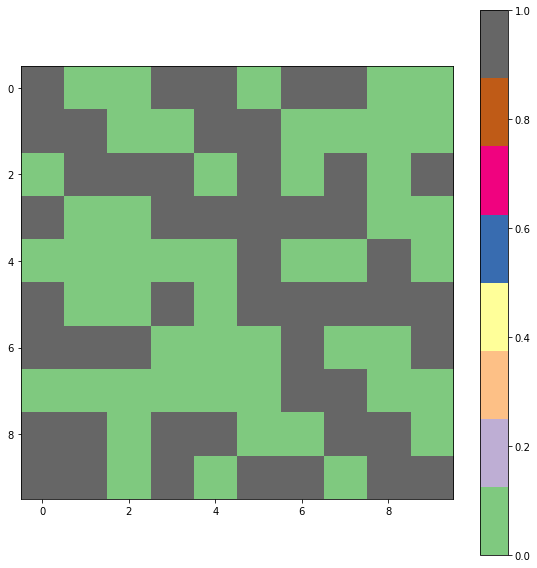

In [81]:
plt.figure(figsize=(8, 8))
plt.imshow(A, cmap="Accent")
plt.colorbar()
plt.tight_layout()

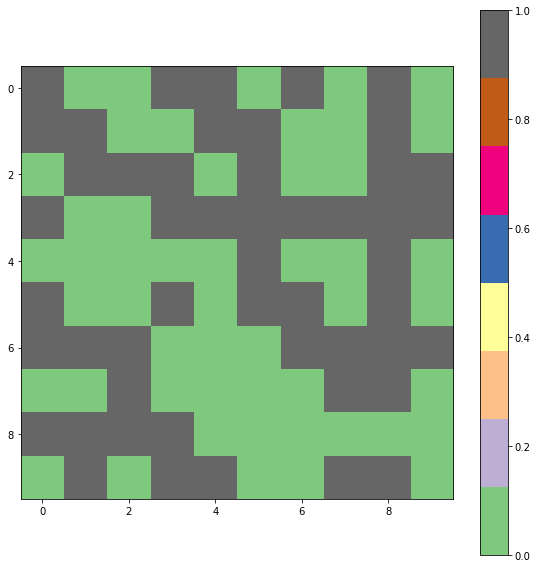

In [72]:
plt.figure(figsize=(8, 8))
plt.imshow(A, cmap="Accent")
plt.colorbar()
plt.tight_layout()

In [73]:
grid = Grid(matrix=A)

start = grid.node(1, 1)
end = grid.node(9, 3)

finder = AStarFinder()
path, runs = finder.find_path(start, end, grid)

print("operations:", runs, "path length:", len(path))
print(grid.grid_str(path=path, start=start, end=end))

operations: 11 path length: 11
+----------+
| ##  # # #|
| s##  ## #|
|#xxx# ##  |
| ##xxxxxxe|
|##### ## #|
| ## #  # #|
|   ###    |
|## ####  #|
|    ######|
|# #  ##  #|
+----------+


In [41]:
runs, path = find_path(1 - A, start=(1,1), end=(7,4))

print("operations:", runs, "path length:", len(path))
print(grid.grid_str(path=path, start=start, end=end))

TypeError: object of type 'int' has no len()

In [64]:
def get_neigbs(lab, x, y):
    ns = []
    if y > 0 and lab[x, y - 1] == 0:
        ns.append((x, y - 1))
    if x > 0 and lab[x - 1, y] == 0:
        ns.append((x - 1, y))
    if x < lab.shape[1] and lab[x + 1, y] == 0:
        ns.append((x + 1, y))
    if y < lab.shape[0] and lab[x, y + 1] == 0:
        ns.append((x, y + 1))
    return ns

In [65]:
def find_path(lab, paths):
    all_new_paths = []
    for path in paths:
        last = path[-1]
        ns = get_neigbs(lab, *last)
        if len(ns) == 0 or all([p in path for p in ns]):
            continue
        for n in ns:
            if n in path:
                continue
            new_path = path.copy() + [n]
            all_new_paths.append(new_path)
    return all_new_paths

In [66]:
paths = [[(1, 1)]]
while True:
    paths = find_path(A, paths)
    if any([p[-1] == (31, 39) for p in paths]):
        break